Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


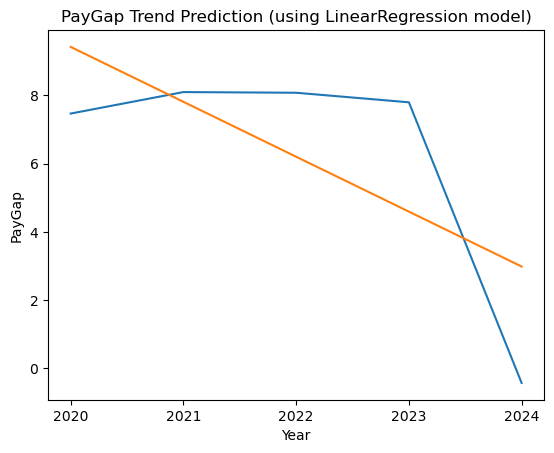

Predicted pay gaps for future years: [9.424 7.814 6.204 4.594 2.984]


In [1]:
import pandas as pd
from sklearnex import patch_sklearn
patch_sklearn()
from sklearnex.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df1 = pd.read_csv("gender_pay_gap_data 2020.csv")
df2 = pd.read_csv("GenderPayGap2021.csv")
df3 = pd.read_csv("GenderPAyGap2-2022.csv")
df4 = pd.read_csv("Glassdoor Gender Pay Gap2023.csv")
df5 = pd.read_csv("GenderPayGap2024.csv")

# Calculate pay gaps (replace function if calculations differ)
def pay_gap(df):
    df['TotalPay'] = df['BasePay'] + df['Bonus']
    male_data = df[(df.Gender == 'Male')]
    female_data = df[(df.Gender == 'Female')]
    avg_pay_m = male_data['TotalPay'].mean()
    avg_pay_f = female_data['TotalPay'].mean()
    pay_gap_curr = (avg_pay_m - avg_pay_f) / avg_pay_m
    return round(pay_gap_curr * 100, 2)  # Return only the pay gap percentage

# Create DataFrames for each year (modify as needed)
data_2020 = pd.DataFrame({'Year': [2020], 'PayGap': [pay_gap(df1)]})
data_2021 = pd.DataFrame({'Year': [2021], 'PayGap': [pay_gap(df2)]})
data_2022 = pd.DataFrame({'Year': [2022], 'PayGap': [pay_gap(df3)]})
data_2023 = pd.DataFrame({'Year': [2023], 'PayGap': [pay_gap(df4)]})
data_2024 = pd.DataFrame({'Year': [2024], 'PayGap': [pay_gap(df5)]})

# Combine DataFrames
df = pd.concat([data_2020, data_2021, data_2022, data_2023,data_2024], ignore_index=True)
# Split data (use all-future split for prediction)
X = df.drop("PayGap", axis=1)
y = df["PayGap"]
# Train model with all data
model = LinearRegression()
model.fit(X, y)

# Retrieve "Year" for prediction
X_with_year = df[["Year"]].copy()  # Copy to avoid modification

# Predict pay gaps for future years
predicted_paygaps = model.predict(X_with_year)

# Visualize trend
plt.plot(df["Year"], df["PayGap"])
plt.plot(X_with_year["Year"], predicted_paygaps)
plt.xlabel("Year")
plt.ylabel("PayGap")
plt.title("PayGap Trend Prediction (using {} model)".format(model.__class__.__name__))
plt.xticks(df["Year"])
plt.show()


# If you also need numerical values:
print("Predicted pay gaps for future years:", predicted_paygaps)
